#Lorenz Attractor

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

The system of equations for Lorent attractor:

\begin{equation}
  \frac{dx}{dt} = \sigma (y - x) \\
  \frac{dy}{dt} = -xz + Rx - y \\
  \frac{dz}{dt} = xy - \beta z
\end{equation}

Here, $\sigma = 10$, $R = 28$, $\beta = 8/3$.

In [ ]:
def func(x, y, z):
  return np.array([10*(y - x), x*(28 - z) - y, x*y - (8/3)*z]) #as vector

We implement 4th order Runge-Kutta as always.

In [ ]:
def rk4(func, ti, tf, h, r0):
  n = int((tf - ti)/h)
  r = np.zeros((n+1, len(r0)))
  t = np.linspace(ti, tf, n+1)
  r[0] = r0

  for i in range(n):
    k1 = h*func(*r[i]) #treating as vector
    k2 = h*func(*(r[i] + 0.5*k1))
    k3 = h*func(*(r[i] + 0.5*k2))
    k4 = h*func(*(r[i] + k3))

    r[i+1] = r[i] + (k1 + 2*k2 + 2*k3 + k4)/6

  return t, r

[[ 5.          5.          5.        ]
 [ 5.0005479   5.10991963  5.01192667]
 [ 5.00218332  5.21969359  5.02437575]
 ...
 [ 5.85465864 -1.8426049  32.59996377]
 [ 5.77794613 -1.86722118 32.50237176]
 [ 5.70175665 -1.89090595 32.40504285]]


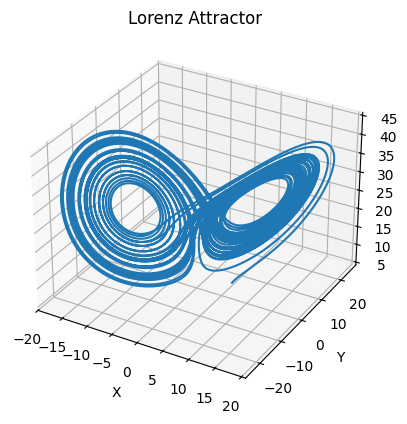

In [ ]:
T, vec = rk4(func, 0, 50, 1e-3, [5, 5, 5])
print(vec)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(vec[:,0], vec[:,1], vec[:,2])
ax.set_title("Lorenz Attractor")
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
plt.show()

Now we can compare the difference between initial conditions $(5, 5, 5)$ and $(5, 5, 5 + 10^{-5})$ up to $t=20$.

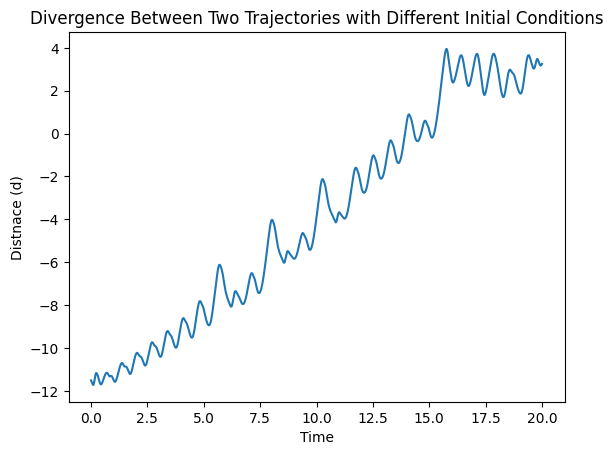

In [ ]:
T_20_1, vec_20_1 = rk4(func, 0, 20, 1e-3, [5, 5, 5])
T_20_2, vec_20_2 = rk4(func, 0, 20, 1e-3, [5, 5, 5+1e-5])

d = np.zeros(len(T_20_1))
for i in range(len(T_20_1)):
  d[i] = np.linalg.norm(vec_20_1[i] - vec_20_2[i])

plt.plot(T_20_1, np.log(d))
plt.xlabel('Time')
plt.ylabel('Distnace (d)')
plt.title('Divergence Between Two Trajectories with Different Initial Conditions')
plt.show()

And with smaller step sizes $h = 5 \cdot 10^{-4}$ and $h = 10^{-6}$. Note that running the block below takes around 24 minutes due to high accuracy for $h = 10^{-6}$.

In [ ]:
T_10_4_1, vec_10_4_1 = rk4(func, 0, 20, 5e-4, [5, 5, 5])
T_10_4_2, vec_10_4_2 = rk4(func, 0, 20, 5e-4, [5, 5, 5+1e-5])
T_10_6_1, vec_10_6_1 = rk4(func, 0, 20, 1e-6, [5, 5, 5])
T_10_6_2, vec_10_6_2 = rk4(func, 0, 20, 1e-6, [5, 5, 5+1e-5])

We interpolate values to plot distance $d$ for different accuracies using $\tt scipy.interpolate$.

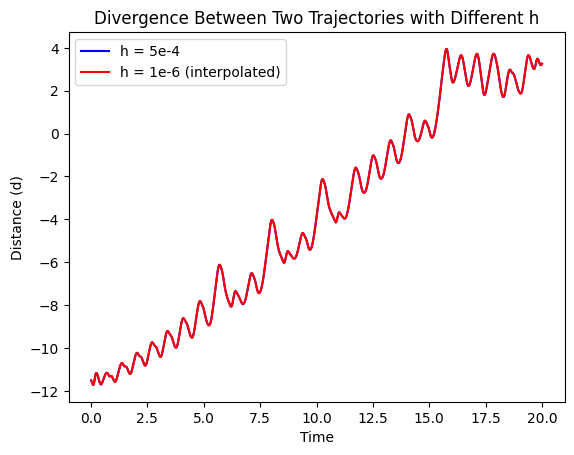

In [ ]:
from scipy.interpolate import interp1d

interp_vec_10_6_1 = interp1d(T_10_6_1, vec_10_6_1, axis=0, kind='linear')
interp_vec_10_6_2 = interp1d(T_10_6_1, vec_10_6_2, axis=0, kind='linear')

vec_10_6_1_on_10_4 = interp_vec_10_6_1(T_10_4_1)
vec_10_6_2_on_10_4 = interp_vec_10_6_2(T_10_4_1)

d_10_4 = np.linalg.norm(vec_10_4_1 - vec_10_4_2, axis=1)
d_10_6 = np.linalg.norm(vec_10_6_1_on_10_4 - vec_10_6_2_on_10_4, axis=1)

plt.plot(T_10_4_1, np.log(d_10_4), label="h = 5e-4", color="blue")
plt.plot(T_10_4_1, np.log(d_10_6), label="h = 1e-6 (interpolated)", color="red")
plt.xlabel("Time")
plt.ylabel("Distance (d)")
plt.title("Divergence Between Two Trajectories with Different h")
plt.legend()
plt.show()

We see that the graph is identical to the previous graph of $d$ vs time.